# Solar Cycle Progression

Analysing solar cycle data from the NOAA Space Weather Prediction Center.

The aim of this analysis is to use measurements of the mean monthly sunspot number (SSN) which has been accuretly recorded since 1755 to view historic trends, plot a smoothed SSN time series, and finally predict the progression of the next solar maxima.

https://www.swpc.noaa.gov/products/solar-cycle-progression

In [58]:
import urllib, json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import interpolate

In [37]:
jsonURL = "https://services.swpc.noaa.gov/json/solar-cycle/observed-solar-cycle-indices.json"
with urllib.request.urlopen(jsonURL) as url:
    dataJSON = json.load(url)
data = pd.DataFrame.from_dict(dataJSON)
data.head()

,time-tag,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10.7,smoothed_f10.7
0,1749-01,96.7,-1.0,-1.0,-1.0,-1.0,-1.0
1,1749-02,104.3,-1.0,-1.0,-1.0,-1.0,-1.0
2,1749-03,116.7,-1.0,-1.0,-1.0,-1.0,-1.0
3,1749-04,92.8,-1.0,-1.0,-1.0,-1.0,-1.0
4,1749-05,141.7,-1.0,-1.0,-1.0,-1.0,-1.0


In [55]:
# Query data from yr 2000 onwards.
milDt = data[(data['time-tag']>="2012-01") & (data['time-tag']<='2023-11')]

# Convert time-tag column to datetime format
milDt['timedate'] = pd.to_datetime(milDt['time-tag'], infer_datetime_format=True).dt.strftime('%Y-%m')

milDt.head()

C:\Users\levet\AppData\Local\Temp\ipykernel_3736\3645734858.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  milDt['timedate'] = pd.to_datetime(milDt['time-tag'], infer_datetime_format=True).dt.strftime('%Y-%m')
C:\Users\levet\AppData\Local\Temp\ipykernel_3736\3645734858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milDt['timedate'] = pd.to_datetime(milDt['time-tag'], infer_datetime_format=True).dt.strftime('%Y-%m')


,time-tag,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10.7,smoothed_f10.7,timedate
3156,2012-01,94.4,95.5,90.06,91.4,134.79,124.9,2012-01
3157,2012-02,47.8,98.1,48.48,93.6,106.86,127.2,2012-02
3158,2012-03,86.6,98.3,77.55,93.5,115.71,127.3,2012-03
3159,2012-04,85.9,95.1,84.10,90.7,113.26,126.3,2012-04
3160,2012-05,96.5,90.9,98.74,87.2,121.40,124.3,2012-05


In [103]:
from scipy.interpolate import splrep, BSpline

tck = interpolate.splrep(milDt.index, milDt['ssn'], s=len(milDt.index))
bspline = BSpline(tck[0], tck[1], tck[2])

from scipy.signal import savgol_filter
savgol_window = 51
polynomial = 10
yhat = savgol_filter(milDt['ssn'], savgol_window, polynomial) # window size 51, polynomial order 3

TypeError: Legend.__init__() got an unexpected keyword argument 'alpha'

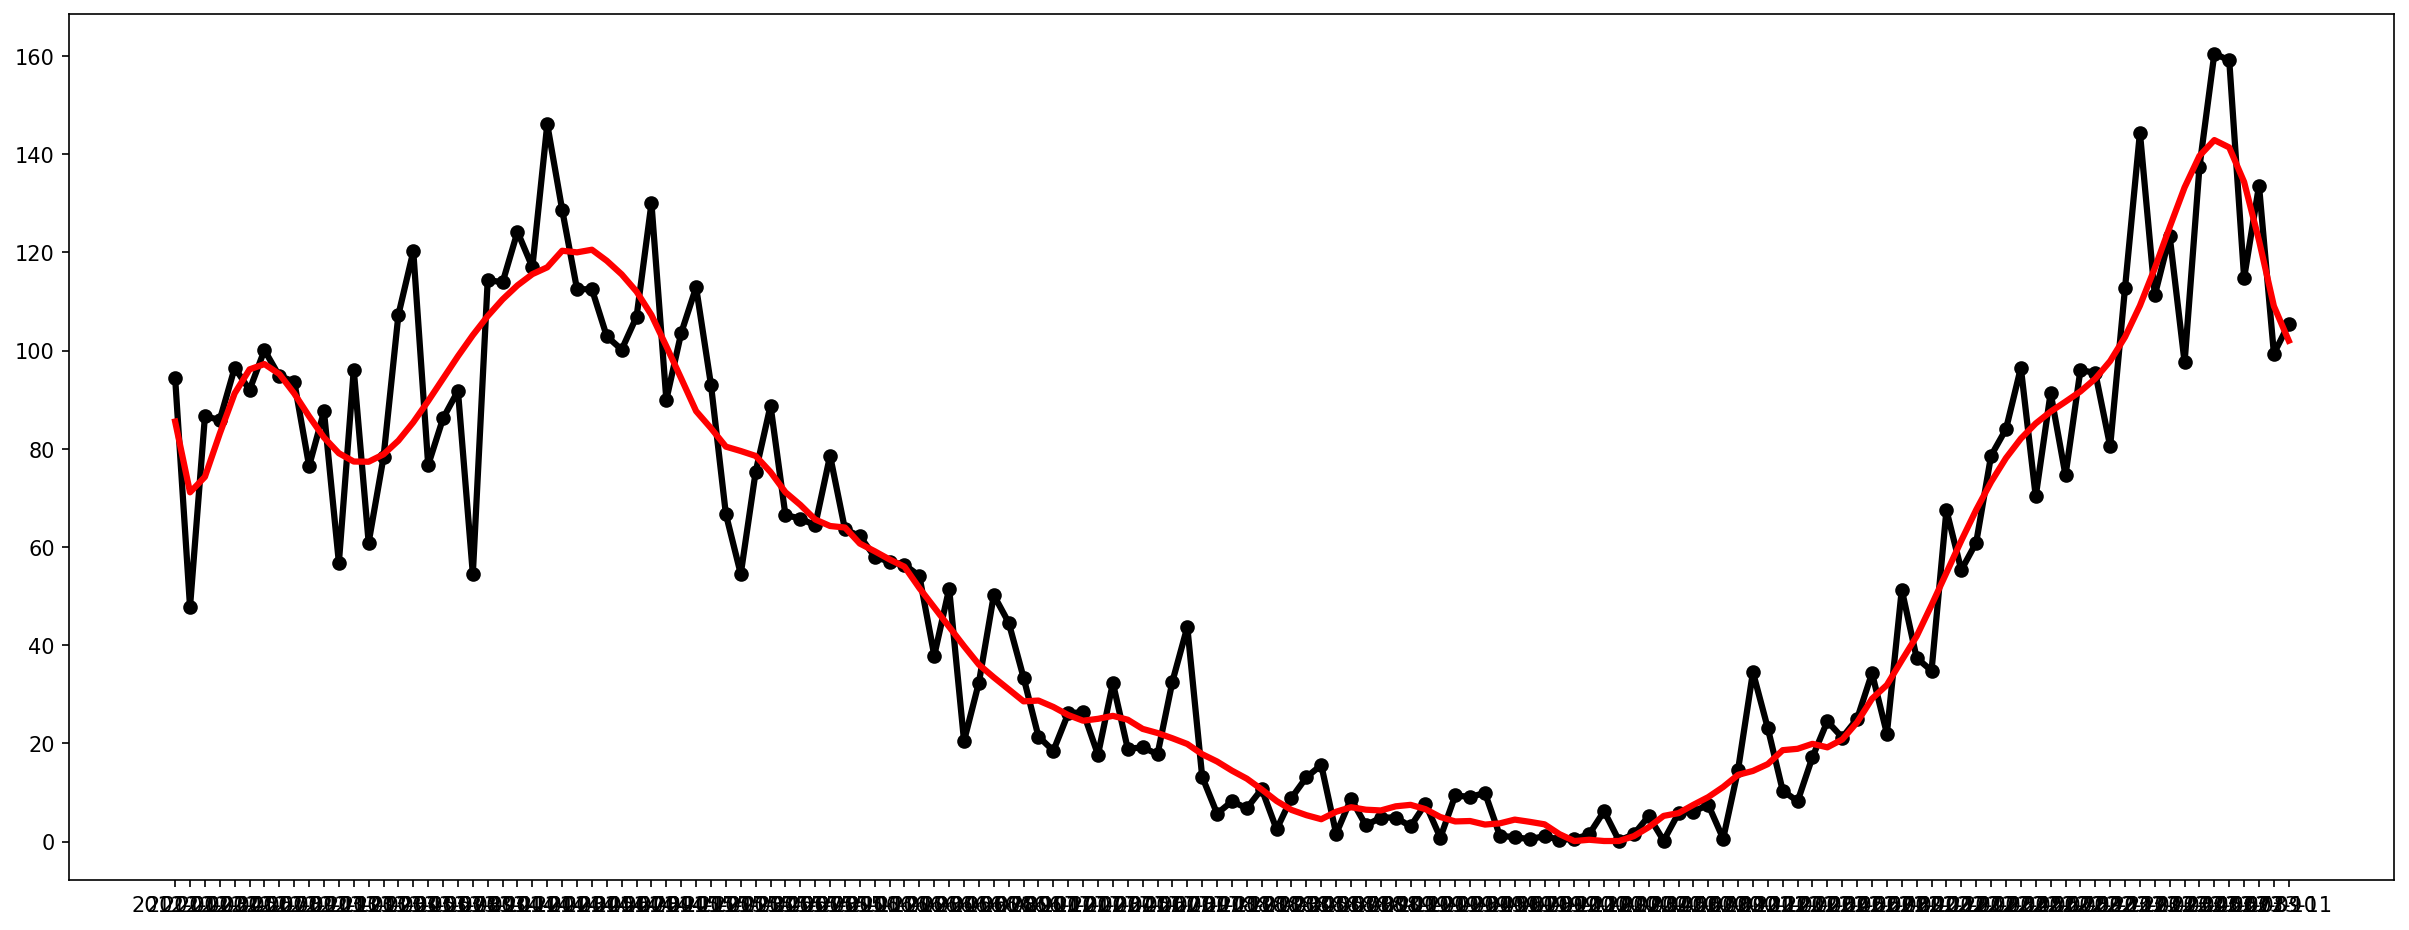

In [106]:
x_width, y_width = 20, 7.5
window = 2
linewidth = 3
fsize = 20

fig, ax = plt.subplots(1,1, figsize=(x_width, y_width), dpi=150)

ax.plot(milDt['time-tag'], milDt['ssn'], '-o', color='k', linewidth=linewidth, label='Observation')
# ax.plot(milDt['time-tag'], milDt['ssn'].rolling(window).mean(), color='m', linewidth=linewidth, label=f'Rolling avg, window={window}')

# ax.plot(milDt['time-tag'], bspline(milDt.index))
ax.plot(milDt['time-tag'], yhat, color='r', linewidth=linewidth, label=f'savgol_window={savgol_window}')


plt.legend(loc='best', fontsize=fsize, framealpha=1)

# Set x-ticks to show every year once
plt.xticks(milDt['time-tag'][::12])
xlabels = [str(i)[:4] for i in milDt['time-tag'][::12]]
ax.set_xticklabels(xlabels, fontsize=fsize, rotation=0)

plt.xlim(milDt['time-tag'].min(), milDt['time-tag'].max())

plt.title("Solar Cycle Sunspot Number Progression | YTD 11 Year Cycle", fontsize=fsize)
plt.ylabel("Sunspot Number", fontsize=fsize)
plt.xlabel("Univesal Time", fontsize=fsize)

plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.grid()